###

# Dog & Cat Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 25,000 and final testing is done on seperate 10,000 images.
#### Note:This problem statement and dataset is taken from [this](https://www.kaggle.com/c/dogs-vs-cats) Kaggle competition.

### Dependencies
* Jupyter notebook
* Tensorflow
* Python
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://conda.io/docs/)

#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test. 

### Architecture
![image](resources/architecture.jpg)

## (1) Import Libraries;

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import load_model

import pandas as pdfrom 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix 

import matplotlib.image as mpimg

## (2) Warning;

In [2]:
from warnings import filterwarnings

filterwarnings('ignore')

## (3) Using Classifier;

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [3]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 
                                #   If stride not given it equal to 
                                #   pool filter size
        
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                                       epsilon=None, decay=0.0, amsgrad=False)


classifier.compile(optimizer=adam,loss='binary_crossentropy',
                   metrics=['accuracy'])

# (4)               Data Augmentation;
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


## (5) Training Set;

In [5]:
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')

Found 24959 images belonging to 2 classes.


## (6) Validation Set;

In [6]:
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

Found 24959 images belonging to 2 classes.


## (7) Test Set;

In [7]:
#Test Set /no output available:-

test_set1 = test_datagen.flow_from_directory('test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 12994 images belonging to 1 classes.


## (8) 

In [8]:
%%capture

classifier.fit_generator(train_set,
                        steps_per_epoch=800, 
                        epochs = 200,
                        validation_data = test_set,
                        validation_steps = 20, 
                        );

## Some Helpful Instructions:

Finetune you network parameter in last by using low learning rate like 0.00001

Classifier.save('resources/dogcat_model_bak.h5')

from tensorflow.keras.models import load_model
model = load_model('partial_trained1')

#100 iteration with learning rate 0.001 and after that 0.0001

## (9) Load Model:-

In [9]:
classifier = load_model('resources/dogcat_model_bak.h5')

## (10) Prediction of Image:-

1/1 [==============================] - 0s 102ms/step


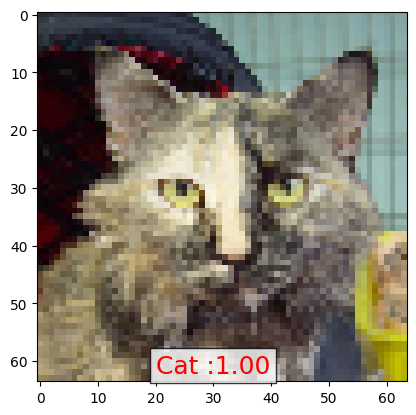

In [10]:
%matplotlib inline


img1 = image.load_img('test/Cat/10.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255

# Create a batch of size 1 [N,H,W,C];

img = np.expand_dims(img, axis=0)

prediction = classifier.predict(img, batch_size=None,steps=1) 
                                            # Gives all class prob.

if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    
    plt.text(20, 62,value,color='red',fontsize=18,
             bbox=dict(facecolor='white',alpha=0.8))
    
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    
    plt.text(20, 62,value,color='red',fontsize=18,
             bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

## (11) Load Model:-

In [11]:
test_set.reset

ytesthat = classifier.predict_generator(test_set)

df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

## (12) Display Data Format:-

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Cat\0.jpg,0.00000,0,0
1,Cat\1.jpg,0.00000,0,0
2,Cat\10.jpg,0.00000,0,0
3,Cat\100.jpg,0.99970,0,1
4,Cat\1000.jpg,0.00002,0,0
5,Cat\10000.jpg,0.00000,0,0
6,Cat\10001.jpg,0.00000,0,0
7,Cat\10002.jpg,0.00000,0,0
8,Cat\10003.jpg,0.00000,0,0
9,Cat\10004.jpg,0.00000,0,0


## (13) Misclassified Image:-

In [13]:
misclassified = df[df['y']!=df['y_pred']]

print('Total misclassified image from 5000 Validation images : %d'
                                             %misclassified['y'].count())

Total misclassified image from 5000 Validation images : 231


## (14) Prediction of Test Set & Confusion Matrix:-

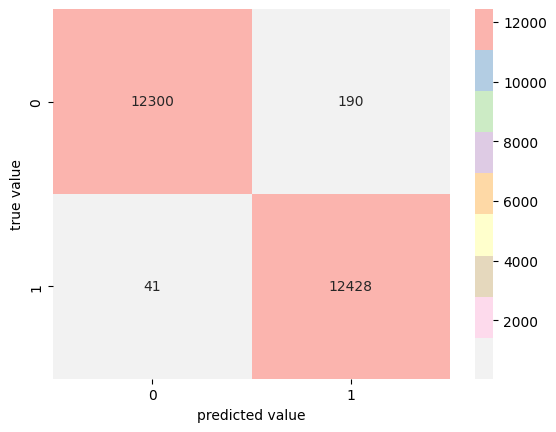

In [34]:
conf_matrix = confusion_matrix(df.y,df.y_pred)

sns.heatmap(conf_matrix,cmap="Pastel1_r",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

## (15) Some of Cat image misclassified as Dog:-

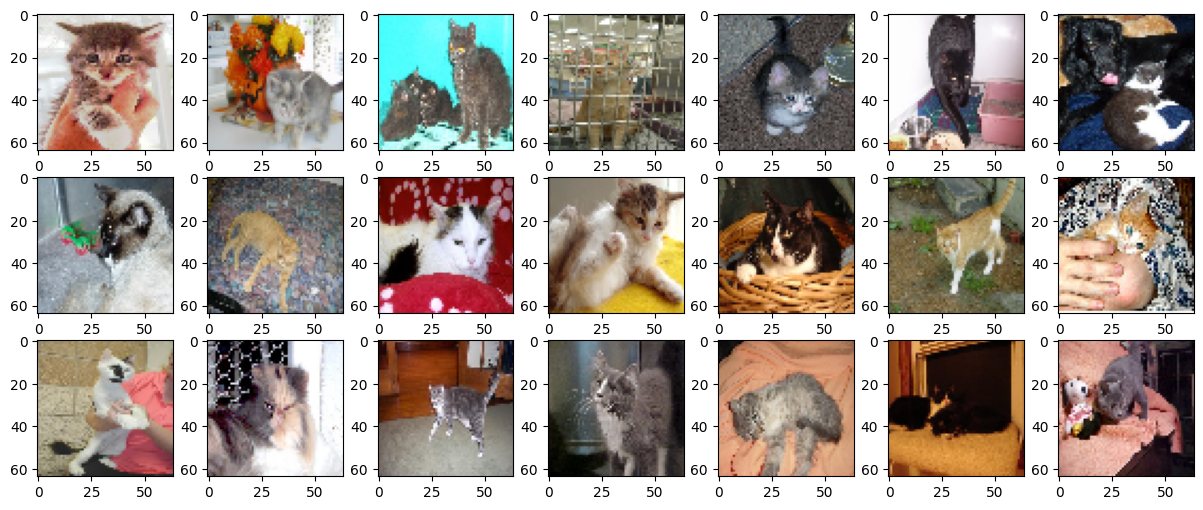

In [15]:
CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]

fig=plt.figure(figsize=(15, 6))

columns = 7
rows = 3

for i in range(columns*rows):
    img = image.load_img('test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

## (16) Some of Dog image misclassified as Cat:-

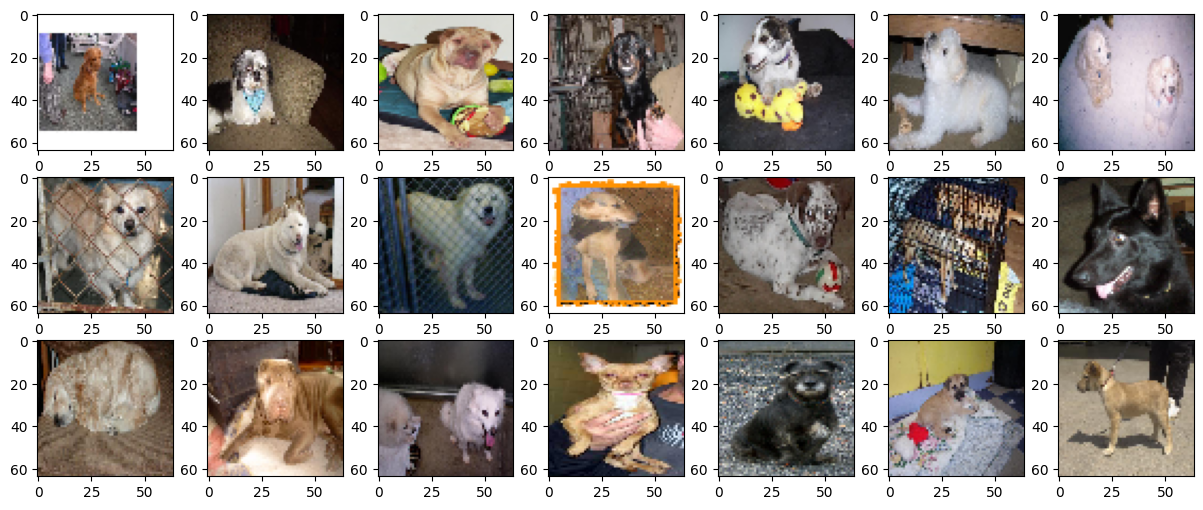

In [16]:
DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))

columns = 7
rows = 3

for i in range(columns*rows):
    
    img = image.load_img('test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    
plt.show()

## (17) Summary:-

In [17]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##                        Visualization of Layers Ouptut

## (18) Input Image for Layer Visulization:-

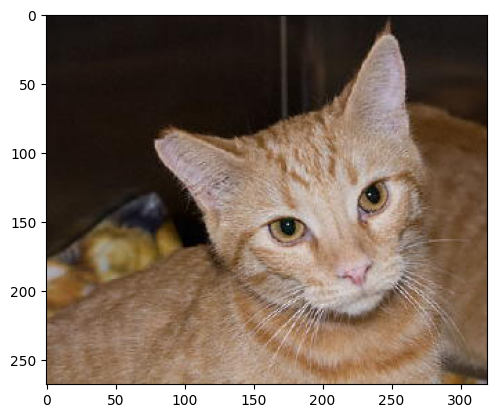

In [18]:
img1 = image.load_img('test/Cat/14.jpg')
plt.imshow(img1);

## (19) Input Image for Layer Visulization:-

In [19]:
#Preprocess Image;

img1 = image.load_img('test/Cat/14.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

## (20) Model Layers Name:-

In [20]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


## (21) Model Output:-

In [21]:
from tensorflow.keras.models import Model

conv2d_6_output = Model(inputs=classifier.input, 
                        outputs=classifier.get_layer('conv2d_6').output)


conv2d_7_output = Model(inputs=classifier.input,
                        outputs=classifier.get_layer('conv2d_7').output)

## (22) Model Features:-

In [22]:
conv2d_6_features = conv2d_6_output.predict(img)

conv2d_7_features = conv2d_7_output.predict(img)

print('First conv layer feature output shape : ',conv2d_6_features.shape)

print('First conv layer feature output shape : ',conv2d_7_features.shape)

1/1 [==============================] - 0s 62ms/step
First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


## (23) Single Convolution Filter Output:-

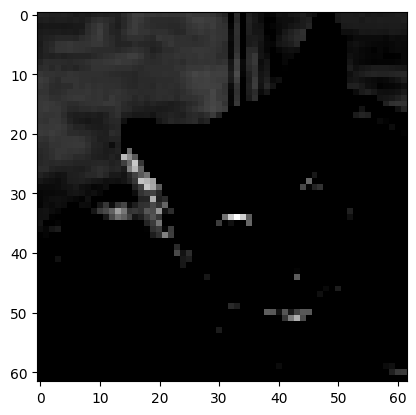

In [23]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

## (24) First Covolution Layer Output:-

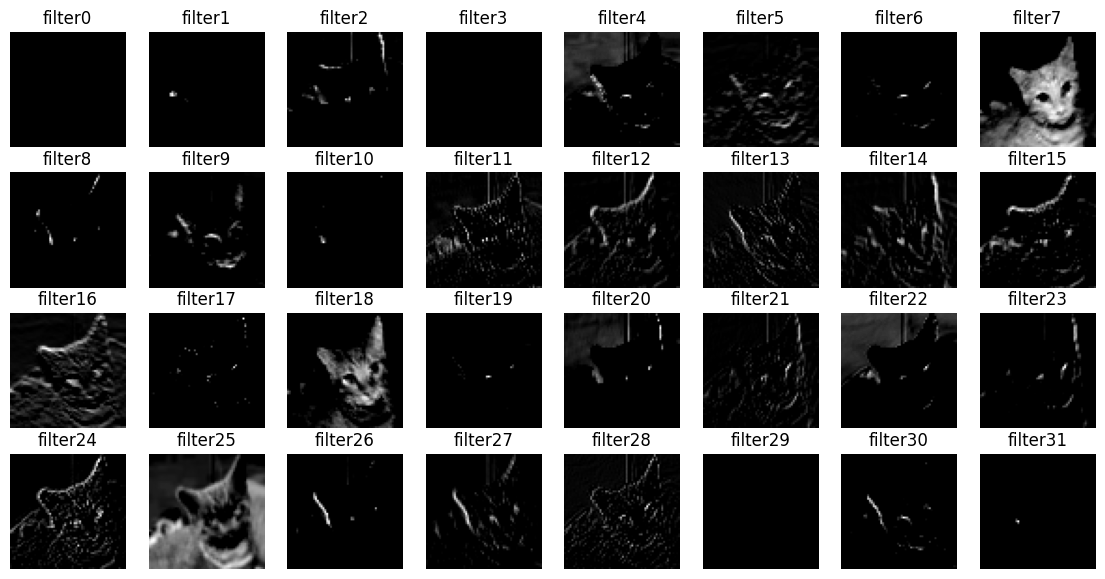

In [24]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
    
plt.show()

## (25) Second Covolution Layer Output:-

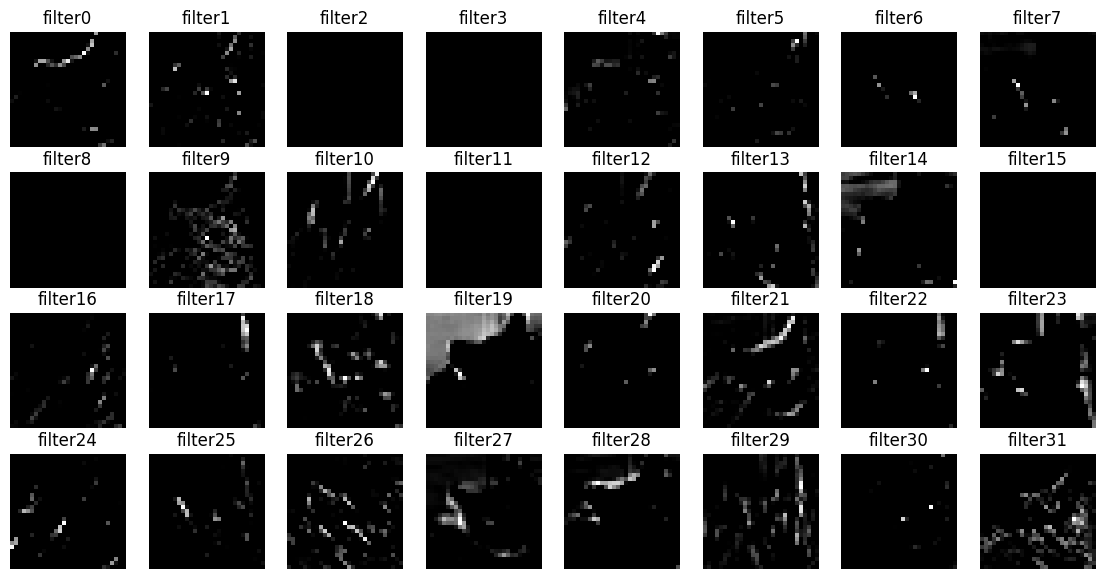

In [25]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
   
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
    
plt.show()

## (26) Model Performance on Unseen Data:-

1/1 [==============================] - 0s 28ms/step


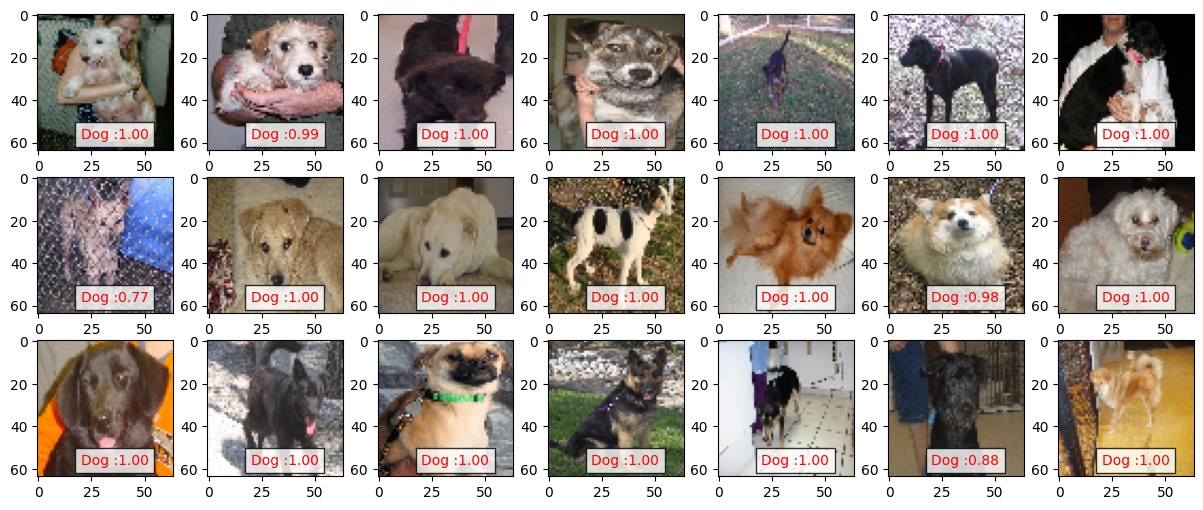

In [26]:
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3

for i in range(columns*rows):
    
    fig.add_subplot(rows, columns, i+1)
    
    img1 = image.load_img('test1/'+
                    test_set1.filenames[np.random.choice(range(12500))],
                    target_size=(64, 64))
    
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    
    prediction = classifier.predict(img, batch_size=None,steps=1) 
                                            # Gives all class prob.
        
    if(prediction[:,:]>0.5):
        
        value ='Dog :%1.2f'%(prediction[0,0])
        
        plt.text(20, 58,value,color='red',fontsize=10,
                 bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        
        plt.text(20, 58,value,color='red',fontsize=10,
                 bbox=dict(facecolor='white',alpha=0.8))
        
    plt.imshow(img1)

## (27) Model Accuracy:-

In [27]:
%%capture

x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

## (28) Persentage of Model Accuracy:-

In [28]:
print('Training Accuracy  : %1.2f%%   Training loss  : %1.6f'
          %(x1[1]*100,x1[0]))


print('Validation Accuracy: %1.2f%%   Validation loss: %1.6f'
          %(x2[1]*100,x2[0]))

Training Accuracy  : 99.64%   Training loss  : 0.016801
Validation Accuracy: 99.07%   Validation loss: 0.033617


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **99.07%** on Validation Data and accuracy of **99.64%** on Training Data which are pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training. You can download this trained model from resource directory and Play with it.